In [2]:
"""
# 2nd

import imageio
import matplotlib.pyplot as plt
import numpy as np

#from scipy import signal

img = imageio.imread('brain-noisy.png')
mask = imageio.imread('mask.png')

plt.imshow(mask)
plt.title("Mask")
plt.show()

plt.imshow(img)
plt.title("Original")
plt.show()

la = np.ma.minimum(mask, img)

plt.imshow(la)
plt.title("Original")
plt.show()
""";

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [2]:
"""%%time
from math import pi, sqrt, exp

def nx(x, mu, sigma):
    result = -(x- mu)**2
    result /= 2*(sigma**2)
    return exp(result)/(sqrt(2*pi)*sigma)

    
def e_step(data, mu, sigma, pi_, K):
    result= np.zeros((data.shape[0], data.shape[1], K), dtype=float)
    for i, line in enumerate(data):
        for j, v in enumerate(line):
            den = 0
            if v:
                for k in range(K):
                    result[i,j][k] = nx(v, mu[k], sigma[k])*pi_[k]
                    den+= result[i,j][k]
                for k in range(K):
                    result[i,j][k] /= den
    return result

def m_step(resp, data, K):
    Nk = np.sum(resp, axis=(0,1))
    #print(resp.shape, data.shape)
    mu = [0]*K
    for k in range(K):
        for i, line in enumerate(data):
            for j, val in enumerate(line):
                if val:
                    mu[k] += val*resp[i, j, k]
        mu[k]/=Nk[k]
    sigma = [0]*K
    for k in range(K):
        for i, line in enumerate(data):
            for j, val in enumerate(line):
                if val:
                    sigma[k] += resp[i, j, k]*((val-mu[k])**2)
        sigma[k]= sqrt(sigma[k]/Nk[k])
    n=np.count_nonzero(data)
    pi_= [x/n for x in Nk]
    return (mu, sigma, pi_)

def em_algorithm(data, k):
    #initialize
    mu=[10, 110, 240]
    sigma=[5]*k
    z=np.zeros((data.shape[0], data.shape[1], k), dtype=float)
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if 0<data[i,j]<105: z[i,j,0]=1 
            if 105<=data[i,j]<210: z[i,j,1]=1 
            if data[i,j]>=210: z[i,j,2]=1
    pi_ = np.average(z, axis=(0,1))
    resp = e_step(data, mu, sigma, pi_, k)
    mu, sigma, pi_ = m_step(resp, data, k)
    resp = e_step(data, mu, sigma, pi_, k)

    return resp



rep=1
def em_algorithm(data, k):
    global rep
    #initialize
    mu=[10, 110, 240]
    oldmu=[0]*k
    sigma=[5]*k
    olds =[0]*k
    z=np.zeros((data.shape[0], data.shape[1], k), dtype=float)
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if 0<data[i,j]<155: z[i,j,0]=1 
            if 155<=data[i,j]<200: z[i,j,1]=1 
            if data[i,j]>=200: z[i,j,2]=1
    pi_ = np.average(z, axis=(0,1))
    resp = e_step(data, mu, sigma, pi_, k)
    while True:
        mu, sigma, pi_ = m_step(resp, data, k)
        cond = [abs(x[0]-x[1])>0.1 and abs(x[2]-x[3])>0.1 for x in zip(mu, oldmu, sigma, olds)]
        if np.any(cond):
            rep+=1
            oldmu=mu
            olds=sigma
        else:
            break
        resp = e_step(data, mu, sigma, pi_, k)
    return resp

c=em_algorithm(la, 3)
plt.imshow(c)
plt.title("Visualization after "+ str(rep)+ " iterations")
plt.show()
""";

NameError: name 'la' is not defined

In [1]:
import imageio
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import NullFormatter
#from scipy import signal

img = imageio.imread('brain-noisy.png')
mask = imageio.imread('mask.png')
masked = np.ma.minimum(mask, img)


In [3]:
from math import pi, sqrt, exp

def nx(x, mu, sigma):
    result = -(x- mu)**2
    result /= 2*(sigma**2)
    return exp(result)/(sqrt(2*pi)*sigma)

def e_step(data, mask, mu, sigma, pi_, K):
    result= np.zeros((data.shape[0], data.shape[1], K), dtype=float)
    for i, line in enumerate(data):
        for j, v in enumerate(line):
            den = 0
            if mask[i][j]:
                for k in range(K):
                    result[i,j][k] = nx(v, mu[k], sigma[k])*pi_[k]
                    den+= result[i,j][k]
                for k in range(K):
                    result[i,j][k] /= den
    return result

def m_step(resp, mask, data, K):
    Nk = np.sum(resp, axis=(0,1))
    mu = [0]*K
    for k in range(K):
        for i, line in enumerate(data):
            for j, val in enumerate(line):
                mu[k] += val*resp[i, j, k]
        mu[k]/=Nk[k]
    sigma = [0]*K
    for k in range(K):
        for i, line in enumerate(data):
            for j, val in enumerate(line):
                sigma[k] += resp[i, j, k]*((val-mu[k])**2)
        sigma[k]= sqrt(sigma[k]/Nk[k])
    n=np.count_nonzero(mask)
    pi_= [x/n for x in Nk]
    return (mu, sigma, pi_)


def em_algorithm(data, mask, k):
    #initialize
    mu=[30, 150, 220]
    sigma=[10,5,5]
    oldmu=[0]*k
    olds =[0]*k
    z=np.zeros((data.shape[0], data.shape[1], k), dtype=float)
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if mask[i][j]:
                if 0<=data[i,j]<155: z[i,j,0]=1
                if 155<=data[i,j]<200: z[i,j,1]=1 
                if data[i,j]>=200: z[i,j,2]=1
    pi_ = np.average(z, axis=(0,1))
    resp = e_step(data, mask, mu, sigma, pi_, k)
    mu, sigma, pi_ = m_step(resp, mask, data, k)
    resp = e_step(data, mask, mu, sigma, pi_, k)
    print("mu", mu)
    print("sigma", sigma)
    print("pi",pi_)
    return resp

c=em_algorithm(masked, mask, 3)

mu [33.188797705240354, 156.8231064463878, 224.83743658674663]
sigma [39.24041901542087, 18.288060120924843, 20.403898727879763]
pi [0.18950390125497593, 0.2891101688208323, 0.5213859299241924]


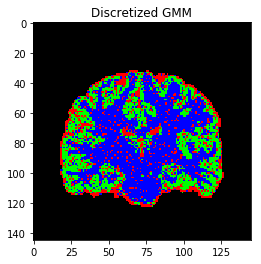

In [4]:

def discretizing(matrix):
    result = np.zeros_like(matrix)
    for i, line in enumerate(matrix):
        for j, rgb in enumerate(line):
            if sum(rgb):
                result[i,j] = [x==max(rgb) for x in rgb]
    return result

a= discretizing(c)
a.shape
plt.imshow(a)

plt.title("Discretized GMM")
plt.show()


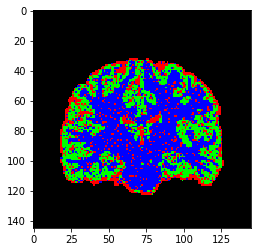

In [15]:
#Unary potential
def V(xi,mu,sigma):
    result=np.log(sqrt(2*np.pi)*sigma)
    result+=((xi-mu)**2)/(2*(sigma**2))
    return result

#Define Generalized Potts Model
def Potts(zi,zj,beta):
    return 0 if np.all([x==y for x,y in zip(zi,zj)]) else beta

#Function to retrieve the cliques:
def cliques(array,i,j):
    neighbours=[array[i-1][j],array[i+1][j],array[i][j-1],array[i][j+1]]
    neighbours=[x for x in neighbours if x.any()]
    return neighbours

def energy(resp,neighbours,beta):
    zmoozez=0
    for each in neighbours:
        zmoozez=Potts(resp,each,beta)+zmoozez
    return zmoozez

# 1 step ICM
def ICM_init(data, mask, mu, sigma):
    init = np.zeros((data.shape[0], data.shape[1], 3))
    for i in range(1,len(init[0])-1):
        for j in range(1,len(init[1])-1):
            # if the point is backgroun, skip it
            if mask[i][j]:
                red= V(data[i][j],mu[0],sigma[0])
                green= V(data[i][j],mu[1],sigma[1])
                blue= V(data[i][j],mu[2],sigma[2])
                dummie=min(red,blue,green)
                init[i][j]=[dummie==red,dummie==green,dummie==blue]
    return init

def ICM(resp, data, mu, sigma, beta):
    count=0
    result = np.zeros_like(resp)
    for i in range(1,len(resp[0])-1):
        for j in range(1,len(resp[1])-1):
            # if the point has no class, skip it
            if not np.any(resp[i][j]):
                continue
            neighbours=cliques(resp,i,j)
            red=energy(np.array([1. ,0., 0.]),neighbours,beta) + V(data[i][j],mu[0],sigma[0])
            green=energy(np.array([0. ,1., 0.]),neighbours,beta) + V(data[i][j],mu[1],sigma[1])
            blue=energy(np.array([0. ,0., 1.]),neighbours,beta) + V(data[i][j],mu[2],sigma[2])
            dummie=min(red,blue,green)
            result[i][j]=[dummie==red,dummie==green,dummie==blue]
            if np.any([x!=y for x, y in zip(result[i][j], resp[i][j])]):
                count+=1
    return result, count


# 1 step Iterated Conditional Models(ICM):
def ICM1(data, mask, mu, sigma, beta):
    # using a reasonable init
    resp = ICM_init(data, mask, mu, sigma)
    return ICM(resp, data, mu, sigma, beta)

# using the 2 step EM end parameters 
mymu = [33.188797705240354, 156.8231064463878, 224.83743658674663]
mysigma = [39.24041901542087, 18.288060120924843, 20.403898727879763]

first,_ = ICM1(masked, mask, mymu, mysigma, 0.5)
plt.imshow(first)
plt.show()

Iteration 1 - Change in labels: 137
Iteration 2 - Change in labels: 28
Iteration 3 - Change in labels: 23
Iteration 4 - Change in labels: 23
Iteration 5 - Change in labels: 23


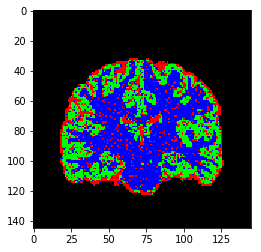

In [17]:
# 5 step Iterated Conditional Models(ICM):
def ICM5(data, mask, mu, sigma, beta):
    # using a reasonable init
    resp = ICM_init(data, mask, mu, sigma)
    for i in range(5):
        resp, cnt = ICM(resp, data, mu, sigma, beta)
        print("Iteration", i+1,"- Change in labels:", cnt)
    return resp, cnt

# using the 2 step EM end parameters 
mymu = [33.188797705240354, 156.8231064463878, 224.83743658674663]
mysigma = [39.24041901542087, 18.288060120924843, 20.403898727879763]

first,_ = ICM5(masked, mask, mymu, mysigma, 0.5)
plt.imshow(first)
plt.show()

In [40]:
# 5 step Iterated Conditional Models(ICM):
def ICM_EM(data, mask, mu, sigma, beta):
    # using a reasonable init
    resp = ICM_init(data, mask, mu, sigma)
    resp, cnt = ICM(resp, data, mu, sigma, beta)
    # resp contains the hard labels
    # Calculate posterior distribution of labels ???
    cnt = 100
    rep=0
    oldmu=[0]*3
    oldsi=[0]*3
    cond=[True]*3
    while cnt and rep<15 and np.any(cond):
        prev = resp.copy()
        oldmu, oldsi = mu, sigma
        mu, sigma, _ = m_step(resp, mask, data, K=3)
        resp, cnt = ICM(resp, data, mu, sigma, beta)
        cond = [abs(x[0]-x[1])>0.1 and abs(x[2]-x[3])>0.1 for x in zip(mu, oldmu, sigma, oldsi)]
        print("changed:", cnt)
        print("mu", mu)
        print("sigma", sigma)
        rep+=1
    return resp, prev

changed: 102
mu [35.277415143603136, 159.40706476030277, 226.12002017145738]
sigma [40.8064838523122, 18.533809277590812, 19.564257694125136]
changed: 49
mu [37.110331632653065, 160.67698744769874, 226.5696784073507]
sigma [42.076187523617826, 18.127311675519703, 19.25105141414296]
changed: 31
mu [38.18753933291378, 161.3757828810021, 226.80678314491263]
sigma [42.823287228580796, 17.943774345111034, 19.092210796147203]
changed: 17
mu [38.78201124297314, 161.80708333333334, 226.9625806451613]
sigma [43.208563546189055, 17.82848469424852, 18.9869467840139]
changed: 7
mu [39.299813780260706, 162.05632040050062, 227.02843846949327]
sigma [43.57110094953059, 17.720697245482384, 18.940122760918033]
changed: 1
mu [39.61038961038961, 162.16638795986623, 227.03775536591672]
sigma [43.787524206108586, 17.63962192154651, 18.933706893129028]
changed: 0
mu [39.61038961038961, 162.1792728792311, 227.04655975168131]
sigma [43.787524206108586, 17.647191176759172, 18.928238834100668]


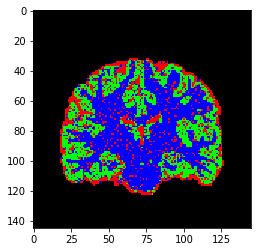

In [41]:
final,cnt = ICM_EM(masked, mask, mymu,mysigma,0.5)
plt.imshow(final)
plt.show()

changed: 967
mu [58.989375, 158.4747474747475, 221.86240463036043]
sigma [66.70379870824024, 49.59963005611953, 22.777460147507345]
changed: 858
mu [69.04566563467492, 152.4297794117647, 213.79166666666666]
sigma [70.53676503180027, 55.56436578905138, 48.811096162751504]
changed: 662
mu [84.0527289546716, 151.29233576642335, 203.3304562268804]
sigma [71.01438919772777, 60.96539295649463, 63.52775287708337]
changed: 579
mu [76.79429133858268, 150.42189781021898, 203.81747572815533]
sigma [67.42111172321225, 58.98853744315936, 63.682927292795924]
changed: 552
mu [83.27845528455285, 149.84273318872016, 202.0106640814348]
sigma [68.56573386924751, 61.99289310647787, 65.01696622375921]
changed: 543
mu [78.47107438016529, 149.72381297571584, 202.6654615570017]
sigma [66.40773122622333, 60.29434730217845, 64.90762047049013]
changed: 541
mu [82.70582120582121, 149.72743682310468, 201.64068532818533]
sigma [67.67022692944968, 62.194672873674044, 65.37621297599351]
changed: 540
mu [78.4378265412

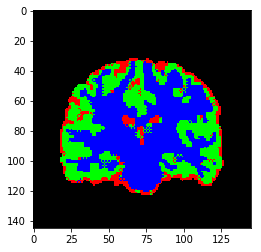

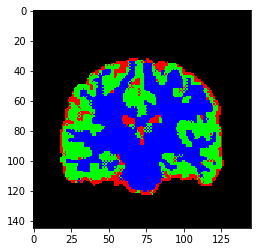

In [43]:
final,cnt = ICM_EM(masked, mask, mymu,mysigma,12)
plt.imshow(cnt)
plt.show()
plt.imshow(final)
plt.show()

changed: 834
mu [56.06638503319252, 162.57042253521126, 221.9605781865966]
sigma [65.58096847761014, 43.07525797117097, 22.51140220200987]
changed: 644
mu [64.56612685560054, 151.98555555555555, 223.0262587980509]
sigma [71.97832941407887, 55.984562808327084, 20.626834074719707]
changed: 557
mu [65.76073187895848, 152.34062830921286, 222.21976808393154]
sigma [71.80052244805354, 60.439344212751564, 20.8494979302622]
changed: 519
mu [65.26962209302326, 150.4896408839779, 223.16259711431744]
sigma [72.30128626647944, 60.06784748539335, 19.895347158016964]
changed: 506
mu [65.74668630338734, 151.0418509697176, 222.6071528359877]
sigma [71.26752095808617, 62.22655008924313, 20.134818419676638]
changed: 501
mu [65.26472781506338, 150.10896785109983, 223.13268156424581]
sigma [72.0405419747327, 61.2973637786366, 19.783125648061297]
changed: 499
mu [66.38955223880598, 150.4482990906029, 222.67003083823943]
sigma [71.48178274202868, 62.92272954613989, 20.037899514671732]
changed: 499
mu [65.25

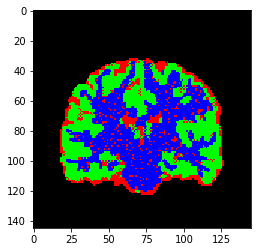

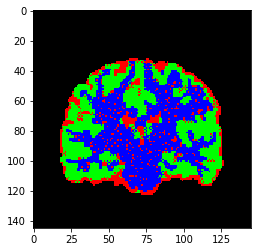

In [42]:
final, prev = ICM_EM(masked, mask, mymu,mysigma,11)
plt.imshow(prev)
plt.show()
plt.imshow(final)
plt.show()

changed: 818
mu [55.90717299578059, 162.5671765192228, 222.19773565034228]
sigma [65.33220945067391, 42.95410239660071, 21.93924122577074]
changed: 625
mu [64.98453261600538, 152.15631929046563, 223.06272060819984]
sigma [72.35223861021899, 56.03926692199427, 20.427088750064378]
changed: 537
mu [66.02178496134927, 152.32863684395915, 222.3289983397897]
sigma [72.02770570958427, 60.463917383241615, 20.511013285886957]
changed: 501
mu [65.5878084179971, 150.5241379310345, 223.18148971650916]
sigma [72.55968903292928, 60.13334983341491, 19.789894777425793]
changed: 485
mu [65.96980854197349, 150.98709239130434, 222.6675993284835]
sigma [71.52950183941522, 62.22555370971481, 19.98497692624761]
changed: 479
mu [65.38777032065623, 150.20202360876897, 223.21372549019608]
sigma [72.13958401584122, 61.297043022134496, 19.685936963526274]
changed: 474
mu [66.35276532137519, 150.48538797447094, 222.72732378545354]
sigma [71.4731884188512, 62.956206324760586, 19.88115653364571]
changed: 474
mu [65

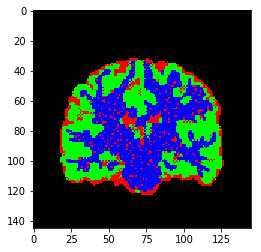

In [38]:
final,cnt = ICM_EM(masked, mask, mymu,mysigma,10)
plt.imshow(final)
plt.show()